Testing Clustering on January 2013

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
january2013=pd.read_csv("datasets/yellow_tripdata_2013-01.csv")

In [8]:
january2013 = january2013[['pickup_latitude','pickup_longitude']]
january2013 = january2013.loc[(january2013['pickup_longitude'] > -74.06) & (january2013['pickup_longitude'] < -73.77) & (january2013['pickup_latitude'] > 40.61) &  (january2013['pickup_latitude'] < 40.91)]
january2013 = january2013.reset_index()
january2013 = january2013.drop('index', 1)

In [10]:
print(january2013.shape)
january2013.head()

(14496582, 2)


,pickup_latitude,pickup_longitude
0,40.757977,-73.978165
1,40.731781,-74.006680
2,40.737770,-74.004711
3,40.759945,-73.974600
4,40.748528,-73.976252


In [30]:
%%time
kmeans_5 = KMeans(n_clusters = 10, n_init=1)
kmeans_5.fit(january2013.head(500000))
labels = kmeans_5.labels_

Wall time: 4.13 s


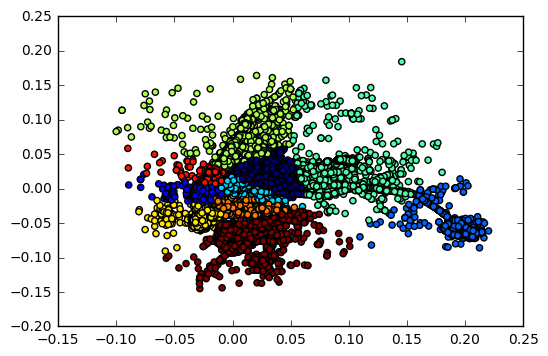

Wall time: 30.4 s


In [32]:
%%time
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(january2013.head(500000))
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [33]:
kmeans_5.cluster_centers_

array([[ 40.77323329, -73.95477891],
       [ 40.74920728, -73.99410993],
       [ 40.64682079, -73.78543843],
       [ 40.75624267, -73.97397668],
       [ 40.76941558, -73.87124044],
       [ 40.79769611, -73.96358083],
       [ 40.72072153, -74.00517837],
       [ 40.73231603, -73.98609942],
       [ 40.76994597, -73.98309561],
       [ 40.68527178, -73.98456235]])